## Feature engineering

- Continuous data vs Discrete data
- Random variable / feature $X$: quantity that depends on a random event
- Tabulaire data bestaat uit 
    - $d$ continue/discrete features of kolommen 
    - $N$ rijen van voorbeelden/observaties

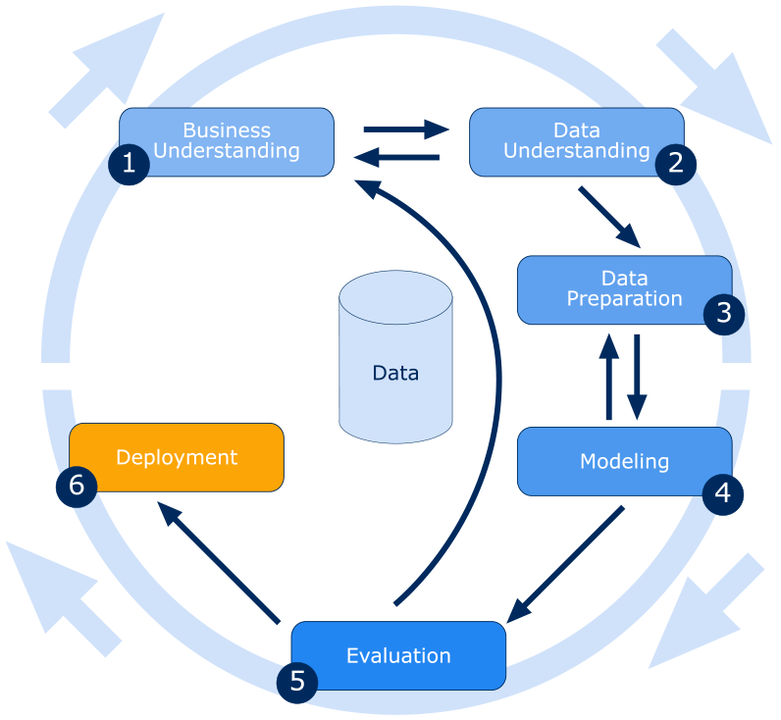

*Bron: [CRISP-DM](https://www.datascience-pm.com/crisp-dm-2/)*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Categorical data encoding

- Nominal, e.g., {red, blue, green}
- Ordinal, e.g., {Very Important, Important, Neutral, Unimportant, Very Unimportant}

In [2]:
df = pd.DataFrame({
    'gender': ['male', 'female', 'male', 'other'],
    'color': ['Red', 'Green', 'Green', 'Blue'],
    'response': ['Agree', 'Neutral', 'Disagree', 'Agree']
})

df

,gender,color,response
0,male,Red,Agree
1,female,Green,Neutral
2,male,Green,Disagree
3,other,Blue,Agree


Nominale categorische variabelen --> One-hot encoding 

In [3]:
df_enc = pd.get_dummies(df, columns=['gender', 'color'])*1

df_enc

,response,gender_female,gender_male,gender_other,color_Blue,color_Green,color_Red
0,Agree,0,1,0,0,0,1
1,Neutral,1,0,0,0,1,0
2,Disagree,0,1,0,0,1,0
3,Agree,0,0,1,1,0,0


Ordinale categorische variabelen --> Label encoding

In [4]:
vals, idx = pd.factorize(df_enc['response'])
vals, idx

(array([0, 1, 2, 0]), Index(['Agree', 'Neutral', 'Disagree'], dtype='object'))

In [14]:
df_enc['response'] = vals

df_enc

,response,gender_female,gender_male,gender_other,color_Blue,color_Green,color_Red
0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,0
2,2,0,1,0,0,1,0
3,0,0,0,1,1,0,0


### Continuous data

(500, 2)

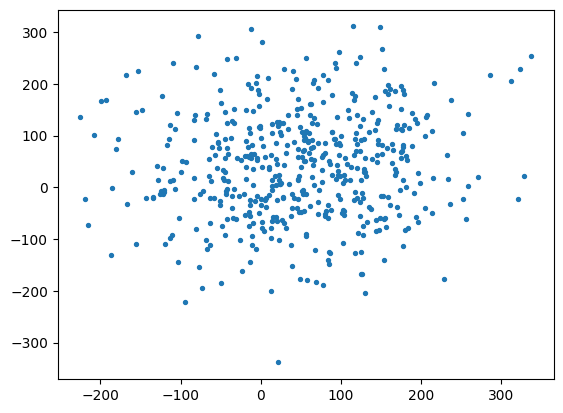

In [44]:
x = np.random.normal(loc=50, scale=100, size=(500, 2))

plt.scatter(x[:, 0], x[:, 1], s=8)

x.shape

Min-max normalisatie:
$$
    x_i' = \dfrac{x_i - \min(X)}{\max(X) - \min(X)}
$$

Effect: $\forall x_i' \implies 0 \leq x_i' \leq 1$ 

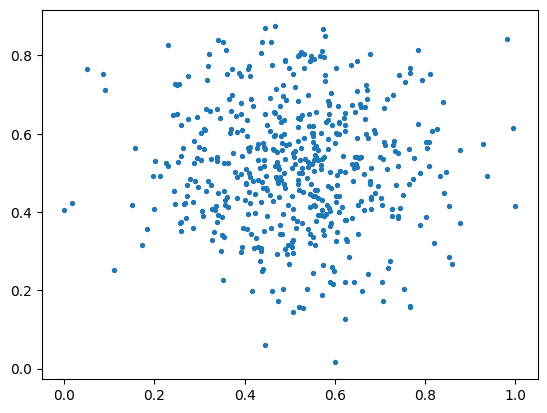

In [16]:
x_norm = (x - x.min()) / (x.max() - x.min())

plt.scatter(x_norm[:, 0], x_norm[:, 1], s=8)

Standardisation / $z$-normalisation:
$$
    z_i = \dfrac{x_i - \mu_X}{\sigma_X}
$$
waarbij:
- $\mu_X$ is het gemiddelde (mean) van $X$
- $\sigma_X$ is de standaard afwijking van $X$


Effect: gegeven $x_i \sim \mathcal{N}(\mu_X, \sigma_X^2)$, dan is $z_i \sim \mathcal{N}(0, 1)$

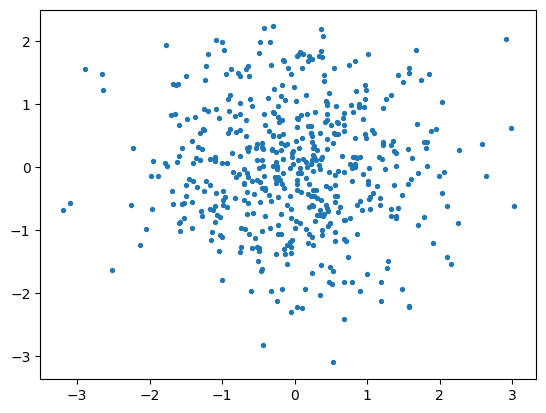

In [17]:
z = (x - x.mean()) / x.std()

plt.scatter(z[:, 0], z[:, 1], s=8)

## Principal Component Analysis

Het probleem:
- Veel variabelen/features zorgen voor veel **dimensies**
- Hoe meer dimensies, hoe meer data benodigd is om de "lege ruimte" te vullen
- Zoveel data hebben we niet (altijd)

Vanuit een ander perspectief:
- Stel we hebben 2 features ($x_1, x_2$) en $x_2 = 3x_1$
- Waarom is dit een probleem? 

Oplossing: reduceren van dimensies met bijv. PCA
- Unsupervised (we gebruiken geen outputs/labels/y-waarden)
- PCA projecteert $d$-dimensionale data naar een $(k < d)$-dimensionale ruimte zodanig dat de variantie maximaal is.
- Nadeel: projecties zijn niet meer interpreteerbaar
- voordeel: nieuwe dimensies bevatten bijna dezelfde hoeveelheid informatie als de oude dimensies  
- https://setosa.io/ev/principal-component-analysis/

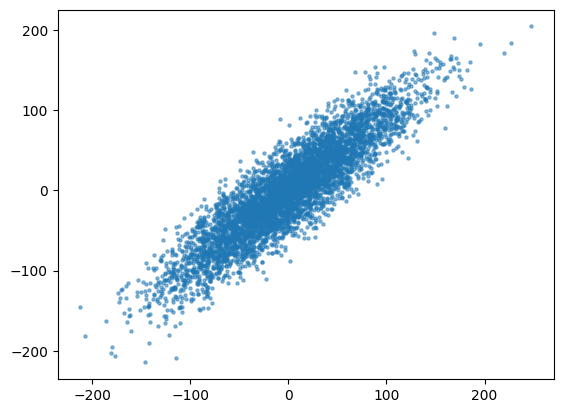

In [18]:
d = 2 # dimensionality of data

# multivariate normal parameters
mean = [0, 0]
cov = [
    [1, 0.9], 
    [0.9, 1]
]
# sample from multivariate normal
x = np.random.multivariate_normal(mean=mean, cov=cov, size=(5000,)) * 60

plt.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

In [19]:
# standardize such that x in N(0, 1)
x = (x - x.mean(keepdims=True)) / x.std(keepdims=True)

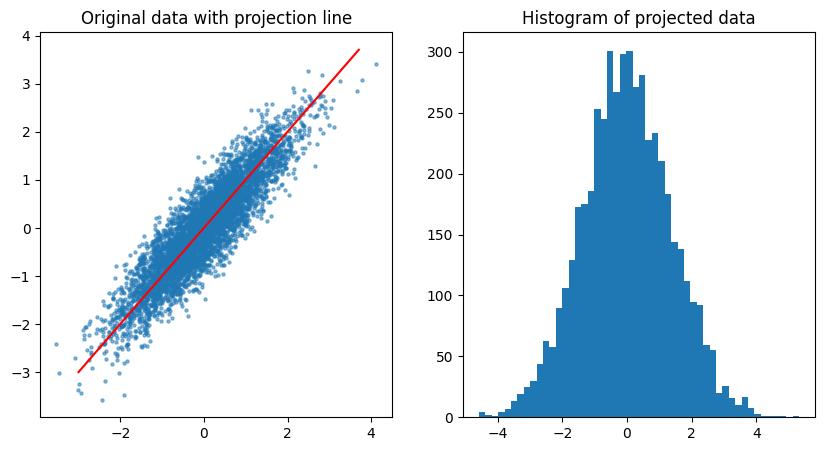

In [20]:
from sklearn.decomposition import PCA

# apply PCA with 1 component
pca = PCA(n_components=1).fit(x)
x_proj = pca.transform(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

# plot original data + PCA projection line
mean = x.mean()
pc1x = pca.components_[0, 0] + mean
pc1y = pca.components_[0, 1] + mean
ax1.plot([mean-3, pc1x+3], [mean-3, pc1y+3], c='r')
ax1.set_title(f"Original data with projection line")

# histogram of projected data
ax2.hist(x_proj, bins=50)
ax2.set_title(f"Histogram of projected data")
plt.show()

In [21]:
x.shape, x_proj.shape

((5000, 2), (5000, 1))

## Anscombes dataset

In [22]:
df = pd.read_csv("./datasets/anscombes.csv")
dataset_ids = list(df.dataset.unique())

df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [23]:
dataset_ids

['I', 'II', 'III', 'IV']

In [24]:
# pandas filtering operation
df[(df['dataset'] == 'I') | (df['dataset'] == 'II')]

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33
5,5,I,14.0,9.96
6,6,I,6.0,7.24
7,7,I,4.0,4.26
8,8,I,12.0,10.84
9,9,I,7.0,4.82


{'I': 0.81642051634484, 'II': 0.8162365060002427, 'III': 0.8162867394895982, 'IV': 0.8165214368885031}


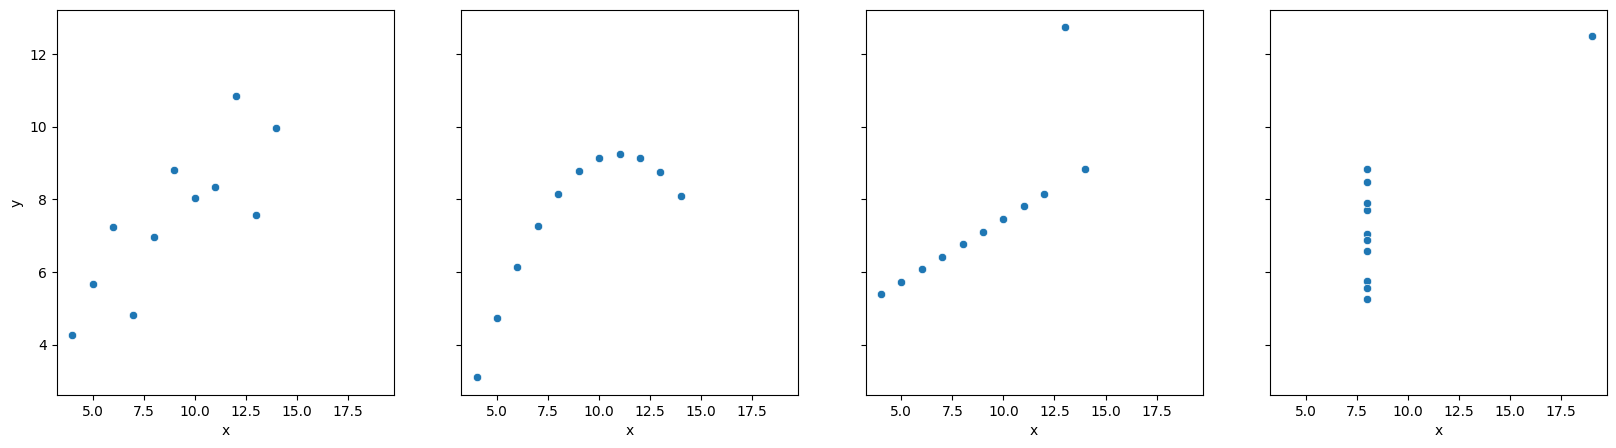

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

corrs = {}
for ax, id in zip(axes, dataset_ids):
    dataset = df[df['dataset'] == id]
    sns.scatterplot(ax=ax, x=dataset["x"], y=dataset["y"])
    corrs[id] = np.corrcoef(dataset["x"], dataset["y"])[0, 1]

print(corrs)
plt.show()

PCA toegepast op de gehele dataset (I, II, III, IV)

Percentage of variance explained [0.90818312 0.09181688]


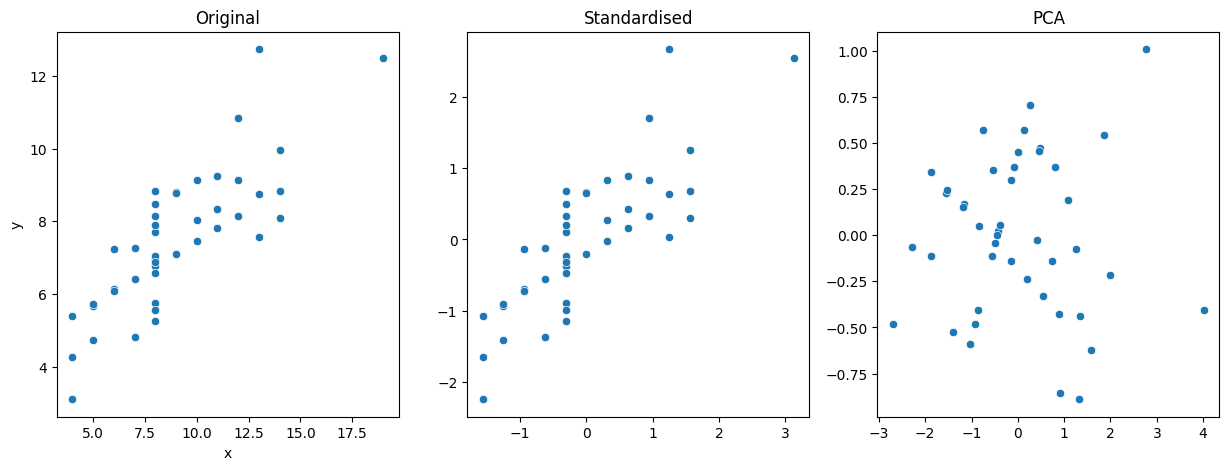

In [27]:
from sklearn.decomposition import PCA

dataset = df[["x", "y"]]

# Standardize data
stand_dataset = (dataset - dataset.mean())/dataset.std()
stand_dataset = stand_dataset.to_numpy()

# Apply PCA
pca = PCA(n_components=2).fit(stand_dataset)
print("Percentage of variance explained", pca.explained_variance_ratio_)
pca_dataset = pca.transform(stand_dataset)

# Compare results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x=dataset['x'], y=dataset['y'])
sns.scatterplot(ax=axes[1], x=stand_dataset[:, 0], y=stand_dataset[:, 1])
sns.scatterplot(ax=axes[2], x=pca_dataset[:, 0], y=pca_dataset[:, 1])
axes[0].set_title('Original')
axes[1].set_title('Standardised')
axes[2].set_title('PCA')

plt.show()

<Axes: >

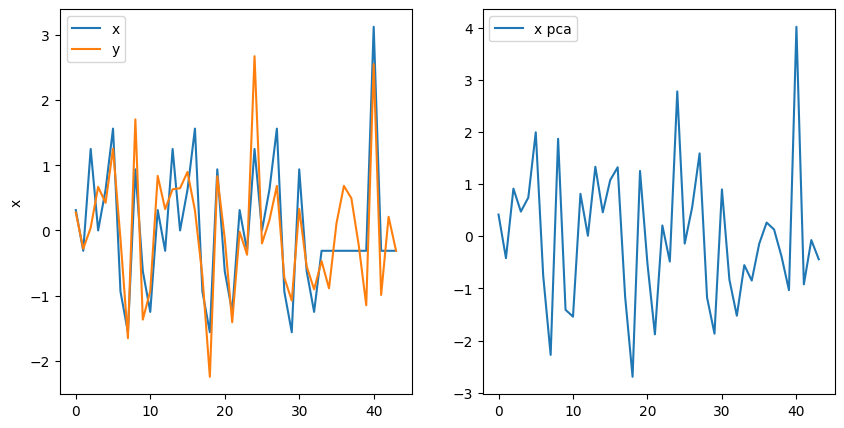

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

std_df = pd.DataFrame(stand_dataset, columns=['x', 'y'])
# apply PCA with 1 component
pca_df = pd.DataFrame(PCA(n_components=1).fit_transform(stand_dataset), columns=["x pca"])

sns.lineplot(ax=axes[0], data=std_df['x'], label="x")
sns.lineplot(ax=axes[0], data=std_df['y'], label="y")
sns.lineplot(ax=axes[1], data=pca_df)

PCA toegepast op de 4 individuele datasets

In [19]:
from sklearn.decomposition import PCA

pcas = []

for id in dataset_ids:
    # filter on id, take (x y) and convert to numpy
    dataset = df[df['dataset'] == id][['x', 'y']].to_numpy()
    # standardize
    dataset = (dataset - dataset.mean())/dataset.std()
    
    # apply pca
    pcas.append(PCA(n_components=1).fit(dataset))

# For each dataset, most of the variance (~93%) is explained by just the first principal component 
[pca.explained_variance_ratio_ for pca in pcas]

[array([0.92876932]),
 array([0.92869675]),
 array([0.92875833]),
 array([0.92884159])]

## Visualisaties

In [27]:
df = pd.read_csv("./datasets/data_dc2.csv", index_col=0)

df.head(10)

,x,y,class
0,-1.679040,500.804975,2.0
1,-1.045952,501.360254,1.0
2,-1.120480,501.528549,1.0
3,-1.689251,498.098798,2.0
4,-0.929261,501.025551,1.0
5,-1.136165,499.969329,2.0
6,-0.904275,502.202581,1.0
7,-0.050320,502.088451,0.0
8,-1.316405,499.695469,2.0
9,-0.583078,501.082139,0.0


<Axes: xlabel='x', ylabel='y'>

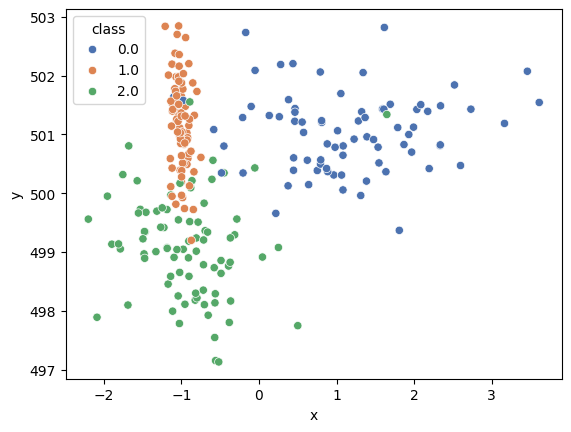

In [28]:
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='deep')

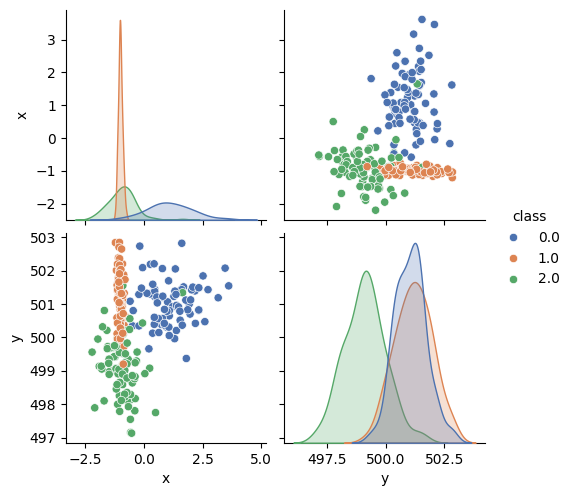

In [29]:
sns.pairplot(df, hue='class', palette='deep')

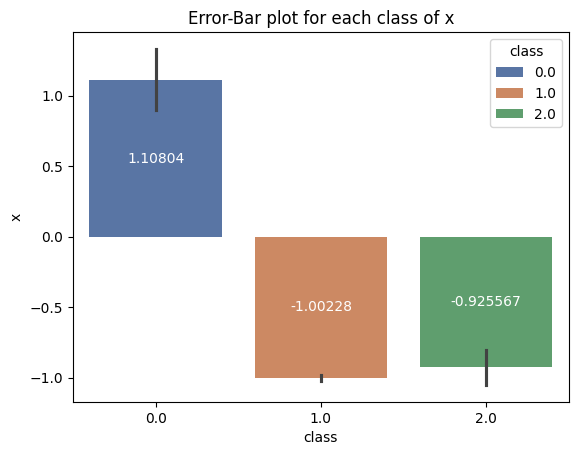

In [81]:
# barplot with 95% CI error bars and labeled with mean
ax = sns.barplot(data=df, x='class', y='x', hue='class', palette='deep', errorbar=('ci', 95))
ax.bar_label(ax.containers[0], fontsize=10, color='white', label_type='center')
ax.bar_label(ax.containers[1], fontsize=10, color='white', label_type='center')
ax.bar_label(ax.containers[2], fontsize=10, color='white', label_type='center')
ax.set_title(f"Error-Bar plot for each class of x")

plt.show()

## PCA analyse

Hoeveel principal components hebben we nodig? 

In [82]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

X.shape, y.shape

((442, 10), (442,))

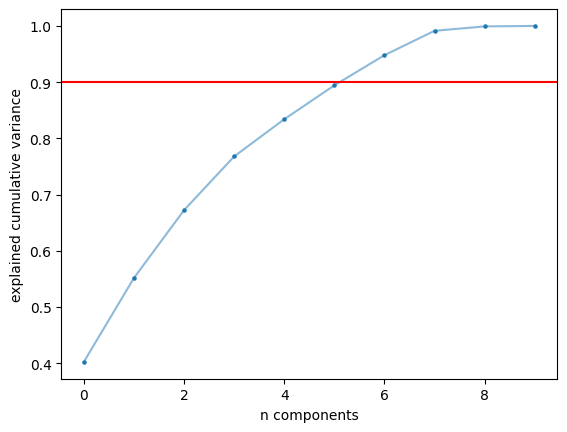

In [84]:
pca = PCA(n_components=X.shape[1]).fit(X)
X_proj = pca.transform(X)

cumulative_expl_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(pca.explained_variance_)), cumulative_expl_var, alpha=0.5)
plt.scatter(range(len(pca.explained_variance_)), cumulative_expl_var, s=5)
plt.xlabel("n components")
plt.ylabel("explained cumulative variance")
plt.axhline(0.9, color='red')

In [32]:
cumulative_expl_var

array([0.40242108, 0.55165304, 0.67224967, 0.76779731, 0.83401545,
       0.89428716, 0.94794372, 0.99131192, 0.99914393, 1.        ])

In [44]:
pca = PCA(n_components=.9, svd_solver='full').fit(X)
pca_X = pca.transform(X)

pca_X.shape

(442, 7)

## (Optioneel) Hoe werkt PCA nu?

Gebruik van **singular value decomposition** (SVD)

Net zoals we scalaire waarden (getallen) kunnen uitdrukken in factoren, e.g.
$$
    32 = 2 \times 4 \times 4
$$
kunnen we dit ook doen bij matrices van getallen. 

Gegeven een $m \times n$ matrix $\mathbf{M}$ zorgt de SVD ervoor dat we $\mathbf{M}$ kunnen opschrijven als
$$
    \mathbf{M} = \mathbf{U} \bm{\Sigma} \mathbf{V}^T
$$
waarbij:
- $\mathbf{U}$ een $m \times m$ matrix is
- $\mathbf{V}$ een $n \times n$ matrix is
- $\bm{\Sigma}$ een $m \times n$ matrix is

$\mathbf{U}$ en $\mathbf{V}$ bevatten **eigenvectoren** en $\bm{\Sigma}$ bevat **eigenwaarden** op de diagonaal. Deze **eigenvectoren** en **eigenwaarden** zeggen iets over de transformatie afgebeeld door de matrix $\mathbf{M}$.

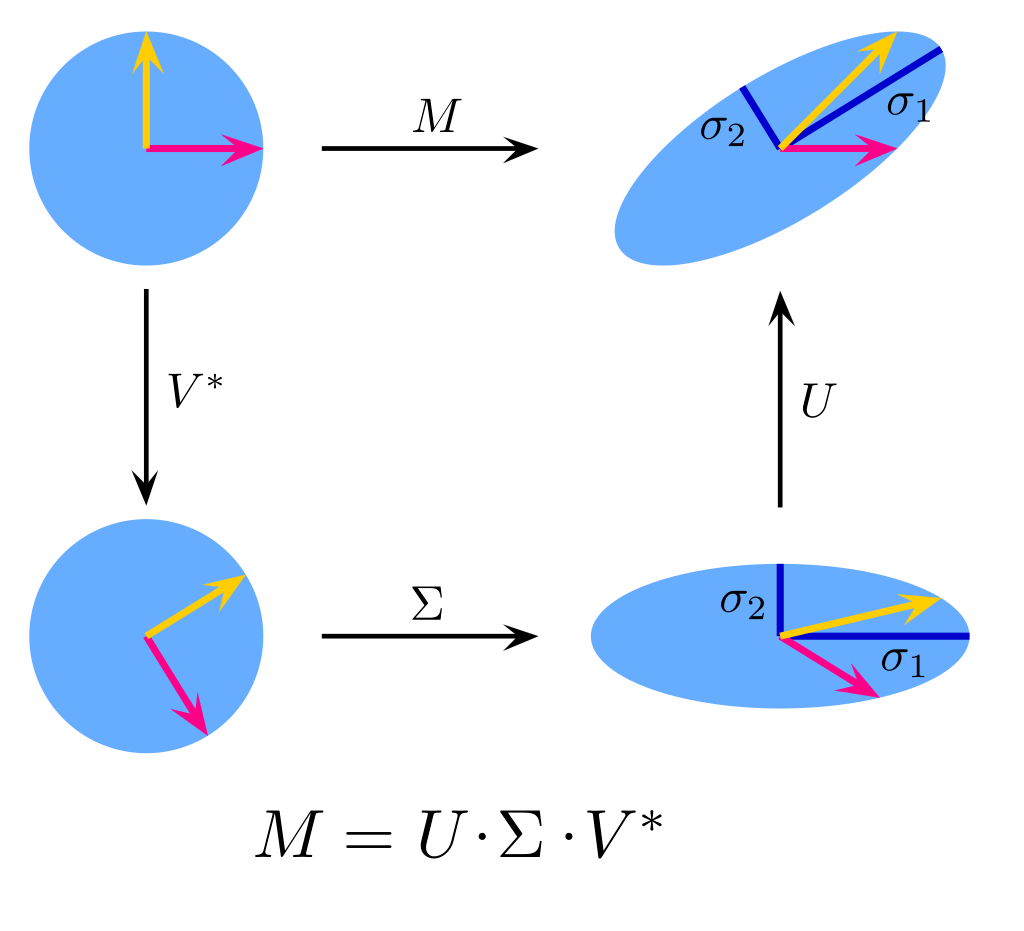

Bij PCA kunnen we SVD toepassen en simpelweg de **eigenvectoren** en **eigenwaarden** sorteren om vervolgens $k$ eigenvectoren/waarden te behouden. 

In [46]:
df = pd.read_csv("./datasets/data_dc2.csv", index_col=0)

df.head(10)

svd = np.linalg.svd(df)

print(f"Matrix U: \t\tshape={svd.U.shape}")
print(f"Singular values: \tshape={svd.S.shape}")
print(f"Matrix V^T: \t\tshape={svd.Vh.shape}")

Matrix U: 		shape=(240, 240)
Singular values: 	shape=(3,)
Matrix V^T: 		shape=(3, 3)


Decomposeren en hercomposeren van de originele data via SVD

In [48]:
rank = 3 # hoeveelheid dimensies die je wilt behouden

# sigma matrix met shape 240 x 3
sigma = np.zeros((svd.U.shape[0], svd.S.shape[0]))

# voeg singular values toe aan de diagonaal
for i in range(rank):
    sigma[i, i] = svd.S[i]

# PCA transformatie met rank als aantal componenten 
pca_df = svd.U @ sigma @ svd.Vh[:, :rank]

<Axes: >

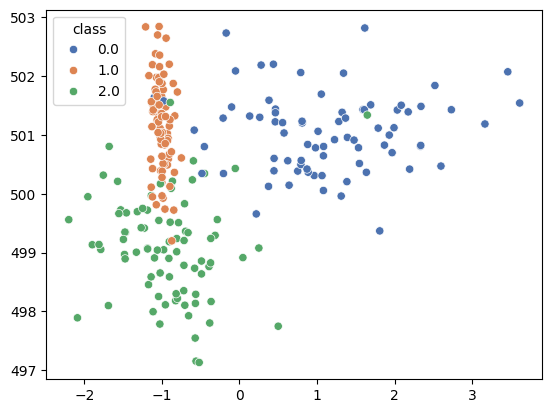

In [50]:
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=df['class'], palette='deep')

Van 3 dimensies naar 1 dimensie

In [51]:
rank = 1 # hoeveelheid dimensies die je wilt behouden

# sigma matrix met shape 240 x 3
sigma = np.zeros((svd.U.shape[0], svd.S.shape[0]))

# voeg singular values toe aan de diagonaal
for i in range(rank):
    sigma[i, i] = svd.S[i]

# PCA transformatie met rank als aantal componenten 
pca_df = svd.U @ sigma @ svd.Vh[:, :rank]

In [52]:
pca_df.shape

(240, 1)

In [53]:
df['pca_df'] = pca_df
df['index'] = df.index
df

,x,y,class,pca_df,index
0,-1.679040,500.804975,2.0,-0.289359,0
1,-1.045952,501.360254,1.0,-0.289679,1
2,-1.120480,501.528549,1.0,-0.289776,2
3,-1.689251,498.098798,2.0,-0.287796,3
4,-0.929261,501.025551,1.0,-0.289485,4
...,...,...,...,...,...
235,1.535065,500.782883,0.0,-0.289343,235
236,-0.489350,498.856495,2.0,-0.288233,236
237,-1.022125,498.653837,2.0,-0.288116,237
238,-1.138651,498.587498,2.0,-0.288078,238


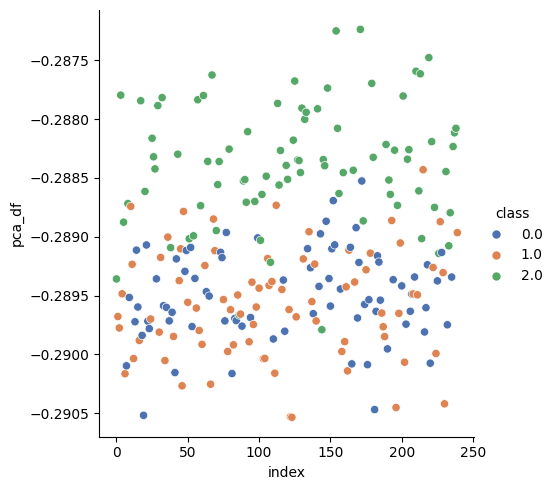

In [54]:
sns.relplot(data=df, x='index', y='pca_df', hue='class', palette='deep')